# Данные по поездкам на такси. На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами

1. journey_id – уникальный id поездки
2. user_id – id пользователя
3. driver_id – id водителя
4. taxi_id – id машины
5. icon – тип поездки
6. start_type – тип заказа (asap, reserved, delayed)
7. start_at – время начала поездки
8. start_lat – исходное местоположение пользователя, широта
9. start_lon – исходное местоположение пользователя, долгота
10. end_at – время окончания поездки
11. end_lat – итоговое местоположение, широта
12. end_lon – итоговое местоположение, долгота
13. end_state – состояние заказа
14. driver_start_lat – исходное местоположение водителя, широта
15. driver_start_lon – исходное местоположение водителя, долгота
16. arrived_at – время прибытия водителя
17. source – платформа, с которой сделан заказ
18. driver_score – оценка водителя клиентом
19. rider_score – оценка клиента водителем

In [19]:
# импорт библиотеки и считывание данных

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

taxi = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-evsa-22/lesson_3/3_taxi_peru.csv', sep=';', parse_dates=['start_at','end_at','arrived_at'])
taxi.head(5)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [12]:
# с какой платформы было сделано больше всего заказов

df_new = (taxi.groupby('source', as_index=False).agg({'journey_id':'count'}))
df_new['all_trip'] = taxi.shape[0] 
df_new['percent_trip'] = ((df_new['journey_id'] / df_new['all_trip']) *100).round()
df_new

,source,journey_id,all_trip,percent_trip
0,Android,4909,23111,21.0
1,Wap,136,23111,1.0
2,iPad,571,23111,2.0
3,iPhone,9741,23111,42.0
4,web,7631,23111,33.0


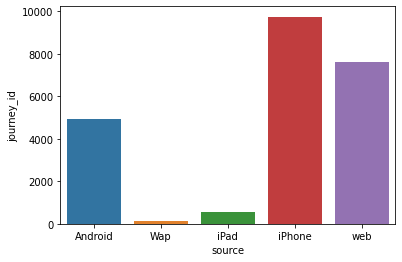

In [7]:
# Визуализация данных: количество заказов по источнику 

sns.barplot(x=df_new.source, y=df_new.journey_id)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


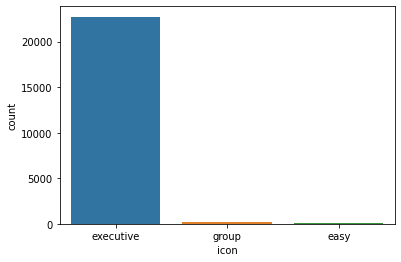

In [8]:
# Визуализация: количество заказов по каждому типу поездки
sns.countplot(taxi.icon)


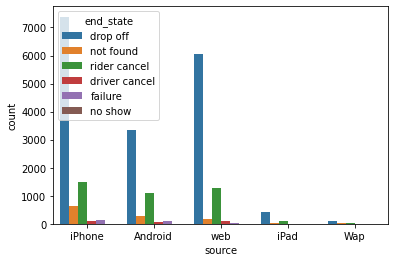

In [9]:
# Визуализация: разбивка состояний заказов по источнику заказа

sns.countplot(x='source', hue='end_state', data=taxi)

In [18]:
# Проверим, как распределены оценки водителей (driver_score). 

# Посчитаем частоту встречаемости каждой из оценок
# Переведем в проценты и округлим до 2 знаков после точки 
# Сбросим индексы
#Переименуем колонки 
#Отсортируем по driver_score в порядке возрастания (от 0 до 5)
rider_score_counts = (taxi.rider_score.value_counts() / taxi.rider_score.count())\
    .mul(100).round(2)\
    .reset_index()\
    .rename(columns={'index':'rider_score', 'rider_score':'percentage'})\
    .sort_values(by='rider_score', ascending=True)

rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


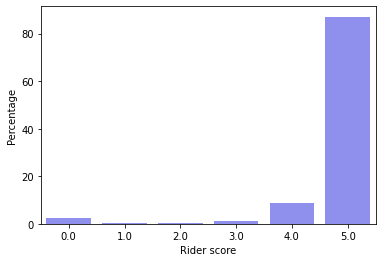

In [20]:
# Визуализация полученных результатов

ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

 #Более чем в 80% случаев водители поставили клиентам 5 звездочек